In [24]:
from pytesseract import pytesseract
import cv2
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
from PIL import Image
import os.path
from os import path
import glob
import sys
#pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [25]:
import pandas as pd
sys.path.append('../scripts')
from text_extraction import Text_Extraction

In [26]:
# reading whole asset data
list_assets = glob.glob('../data/Assets/*')
list_assets[0:5]

['../data/Assets/002dbbd85ef3fe6a2e7d0754fb9f9a1a',
 '../data/Assets/02d99db5aa9193b2bfc98ad6998e0ea7',
 '../data/Assets/0a22f881b77f00220f2034c21a18b854',
 '../data/Assets/00dfe88c4d3fb60793765d314bf24b7c',
 '../data/Assets/0b1ee11406e97cc6fb4229deeb19e6b7']

#### Extracting text from  image

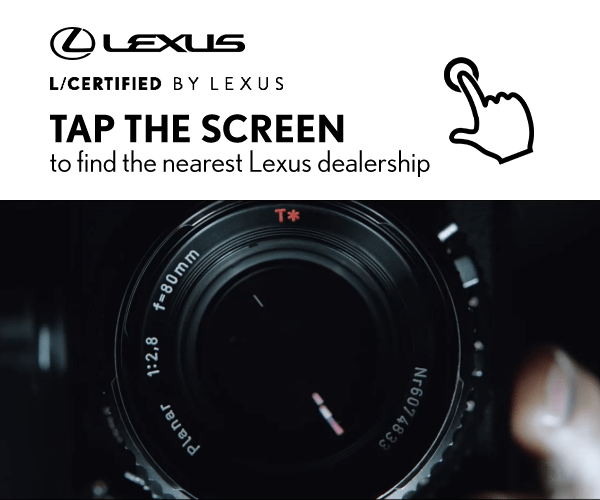

In [22]:
#Reading single data from specific asset#
path = "../data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png"
Image.open(path)

In [27]:
# initialize the class
txtextract =Text_Extraction()
# creating empty dictinary
lists_text =[]
# we have used the preview image for text extraction 
image='_preview.png'
for ls in list_assets:
    if path.exists(ls+'/'+image):
        #lists_text.append(ls)
        text_value=txtextract.extract_text(ls+'/'+image, r'/usr/bin/tesseract')
        lists_text.append(text_value)

In [28]:
# creating dataframe
txt_data = pd.DataFrame(zip(lists_text), columns=['Text'])

In [29]:
# To Dispaly Extracted Txt
txt_data.head()

,Text
0,
1,Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN...
2,Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN...
3,
4,VLR\ner LM\n\nvon ee nb\nTILE BTTONG\n\n \n


In [30]:
# replacing any characters based on the below pattern
txt_data.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
# adding some features
txt_data['Txt_char_lenght'] = txt_data['Text'].str.len()
txt_data['Txt_Word_length'] = txt_data['Text'].str.split().str.len()

In [31]:
txt_data.shape

(8, 3)

In [32]:
txt_data.head()

,Text,Txt_char_lenght,Txt_Word_length
0,,1,0
1,OvexusL/CERTIFIED BY LEXUSTAP THE SCREENto fin...,78,10
2,OvexusL/CERTIFIED BY LEXUSTAP THE SCREENto fin...,78,10
3,,1,0
4,VLRer LMvon ee nbTILE BTTONG,30,5


In [34]:
#To save extracted text

